In [4]:
from enum import Enum

In [5]:
class Disc(Enum):
  EMPTY = 0
  RED = 1
  YELLOW = 2

In [4]:
Disc.RED

<Disc.RED: 1>

In [5]:
table = []

In [6]:
table.append(Disc.RED)

In [7]:
def divide(a, b):
  return a / b

In [8]:
divide(10, 2)

5.0

In [9]:
divide(10, 0)

ZeroDivisionError: ignored

In [14]:
import numpy as np

def divide(a, b):
  try:
    result = a / b
  except:
    print('We are here!')
    return np.nan
  return result

In [15]:
divide(10, 2)

5.0

In [16]:
divide(10, 0)

We are here!


nan

In [17]:
import numpy as np

def divide(a, b):
  try:
    result = a / b
  except ZeroDivisionError:
    print('We are here!')
    return np.nan
  return result

In [18]:
divide(10, 0)

We are here!


nan

In [19]:
a = np.arange(9).reshape((3, 3))
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [20]:
np.diag(a)

array([0, 4, 8])

In [21]:
b = np.array([1, 10, 100])
b

array([  1,  10, 100])

In [22]:
np.diag(b)

array([[  1,   0,   0],
       [  0,  10,   0],
       [  0,   0, 100]])

In [23]:
x_coords = np.array([1, 2, 3])
y_coords = np.array([1, 10, 100])

In [25]:
x_mesh, y_mesh =np.meshgrid(x_coords, y_coords)

In [26]:
x_mesh

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [27]:
y_mesh

array([[  1,   1,   1],
       [ 10,  10,  10],
       [100, 100, 100]])

In [28]:
x_mesh.shape

(3, 3)

In [6]:
POINTS = 6
SIDE = 1

def build_point_positions():
  x_coords = np.linspace(0, SIDE, POINTS)
  y_coords = np.linspace(0, SIDE, POINTS)
  
  x_mesh, y_mesh = np.meshgrid(x_coords, y_coords)
  return x_mesh.flatten(), SIDE - y_mesh.flatten()

In [42]:
x_mesh, y_mesh = build_point_positions()

In [43]:
x_mesh[20]

0.4

In [44]:
x_mesh[14]

0.4

In [45]:
x_mesh[15]

0.6000000000000001

In [46]:
y_mesh[-1]

0.0

In [47]:
y_mesh[0]

1.0

In [55]:
a = np.ones((4,), dtype=np.float64)
np.diag(a, 1)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [7]:
def build_matrix():
  h = SIDE / float(POINTS - 1)
  main_diagonal = np.ones((POINTS * POINTS,), dtype=np.float64) * - 4
  offset_1_diagonal = np.ones((POINTS * POINTS - 1,), dtype=np.float64)
  above_and_below_points = np.ones(
      (POINTS * POINTS - POINTS,),
      dtype=np.float64
  )
  #m1 = np.diag(main_diagonal)
  #m2 = np.diag(offset_1_diagonal, 1)
  #m3 = np.diag(offset_1_diagonal, -1)
  #m4 = np.diag(above_and_below_points, POINTS)
  #m5 = np.diag(above_and_below_points, -POINTS)
  #return m1 + m2 + m3 + m4 + m5

  m = np.diag(main_diagonal) + \
   np.diag(offset_1_diagonal, 1) + \
    np.diag(offset_1_diagonal, -1) + \
    np.diag(above_and_below_points, POINTS) + \
    np.diag(above_and_below_points, -POINTS)
  
  m /= h * h 

  return m

def build_rhs(f):
  x_coords, y_coords = build_point_positions()
  return f(x_coords, y_coords)


In [59]:
build_matrix()

array([[-100.,   25.,    0., ...,    0.,    0.,    0.],
       [  25., -100.,   25., ...,    0.,    0.,    0.],
       [   0.,   25., -100., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ..., -100.,   25.,    0.],
       [   0.,    0.,    0., ...,   25., -100.,   25.],
       [   0.,    0.,    0., ...,    0.,   25., -100.]])

In [21]:
class Side(Enum):
  BOTTOM = 0,
  TOP = 1,
  LEFT = 2,
  RIGHT = 3

def condense(m, rhs, d_gamma):
  h = SIDE / float(POINTS - 1)
  x_coords, y_coords = build_point_positions()

  for i in range(POINTS):
    indices = {}
    indices[Side.TOP] = i
    indices[Side.BOTTOM] = POINTS * (POINTS - 1) + i
    indices[Side.LEFT] = i * POINTS
    indices[Side.RIGHT] = i * POINTS + POINTS - 1

    for s in Side:
      index = indices[s]
      x_point = x_coords[index]
      y_point = y_coords[index]
      bc_value = d_gamma(x_point, y_point)

      rhs[index] = 0

      # wipe out the row i
      m[index, :] = 0

      # Copy the i-th column
      clm = m[:, index]

      rhs -= clm * bc_value

      # Now I can wipe out also the column
      m[:, index] = 0

      m[index, index] = -4 / (h * h)
  
def fix_boundary_conditions(sol, d_gamma):
  h = SIDE / float(POINTS - 1)
  x_coords, y_coords = build_point_positions()

  for i in range(POINTS):
    indices = {}
    indices[Side.TOP] = i
    indices[Side.BOTTOM] = POINTS * (POINTS - 1) + i
    indices[Side.LEFT] = i * POINTS
    indices[Side.RIGHT] = i * POINTS + POINTS - 1

    for s in Side:
      index = indices[s]
      x_point = x_coords[index]
      y_point = y_coords[index]
      bc_value = d_gamma(x_point, y_point)

      sol[index] = bc_value


In [22]:
import matplotlib.pyplot as plt

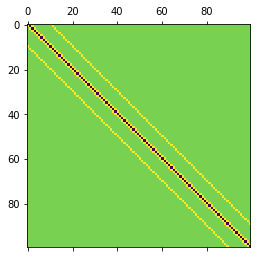

In [23]:
import numpy as np
POINTS = 10

def f(x, y):
  if hasattr(x, "shape"):
    return np.ones((x.shape[0]), dtype=np.float64)
  return 1

def d_gamma(x, y):
  return np.sin(2.5 * np.pi * x)

m = build_matrix()
rhs = build_rhs(f)

plt.matshow(m)

(100, 100)

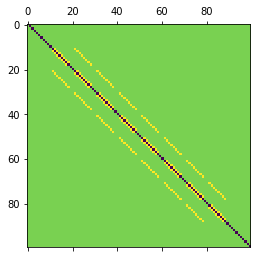

In [24]:
condense(m, rhs, d_gamma)
plt.matshow(m)
m.shape

In [25]:
sol = np.linalg.solve(m, rhs)

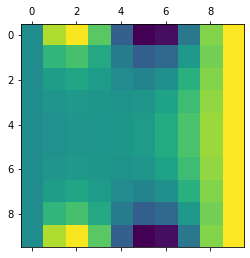

In [26]:
fix_boundary_conditions(sol, d_gamma)
sol = sol.reshape((POINTS, POINTS))
plt.matshow(sol)